## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

## Import dataset

In [ ]:
# URL of the CSV data
csv_url = 'https://archive.ics.uci.edu/static/public/186/data.csv'

# Fetch data from the URL
response = requests.get(csv_url)
data = StringIO(response.text)

# Read the CSV data
df = pd.read_csv(data)

df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


## Renaming columns for simplicity

In [ ]:
df = df.rename(columns={
    'fixed_acidity': 'FA',
    'volatile_acidity': 'VA',
    'citric_acid': 'CA',
    'residual_sugar': 'RS',
    'chlorides': 'Cl',
    'free_sulfur_dioxide': 'FSD',
    'total_sulfur_dioxide': 'TSD',
    'density': 'Den',
    'pH': 'pH',
    'sulphates': 'Sul',
    'alcohol': 'Alc',
    'quality': 'Qual',
    'color': 'Col'
})

## Converting all features to numerical variables

In [ ]:
# Convert 'color' column to binary (0 for 'red', 1 for 'white')
df['Col'] = df['Col'].map({'red': 0, 'white': 1})

In [ ]:
import pandas as pd

# Print summary statistics
df.describe()

# Create an empty DataFrame for the summary
summary = pd.DataFrame()

# Data types of each column
summary['Data Type'] = df.dtypes

# Number of missing values in each column
summary['Missing Values'] = df.isnull().sum()

# Number of unique values in each column
summary['Unique Values'] = df.nunique()

# Check for duplicates (excluding the first occurrence)
duplicate_rows = df[df.duplicated()]

# Number of duplicate rows for each column
summary['Duplicate Rows'] = duplicate_rows.shape[0]

# Display the summary table
print(summary)

     Data Type  Missing Values  Unique Values  Duplicate Rows
FA     float64               0            106            1177
VA     float64               0            187            1177
CA     float64               0             89            1177
RS     float64               0            316            1177
Cl     float64               0            214            1177
FSD    float64               0            135            1177
TSD    float64               0            276            1177
Den    float64               0            998            1177
pH     float64               0            108            1177
Sul    float64               0            111            1177
Alc    float64               0            111            1177
Qual     int64               0              7            1177
Col      int64               0              2            1177


## Drop duplicate rows - to ensure data integrity

In [ ]:
df = df.drop_duplicates()

## Plot distribution of quality parameter

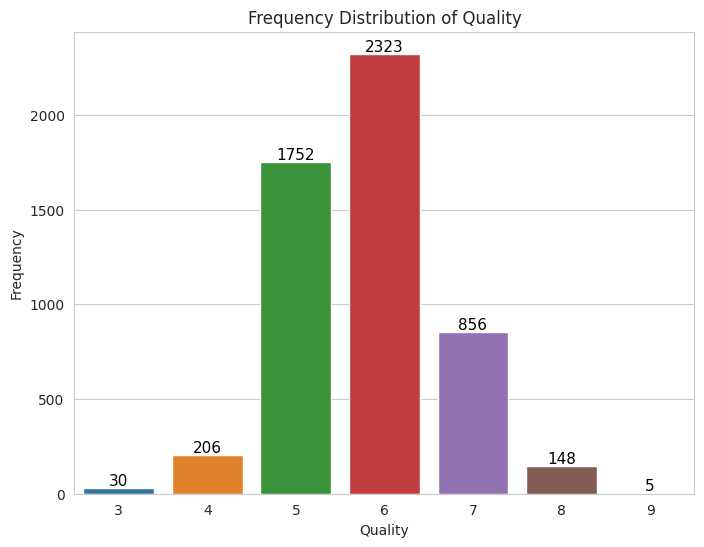

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create a count plot for the 'Quality' column
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Qual', data=df)

# Add count annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Set the title and labels
plt.title('Frequency Distribution of Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')

# Show the plot
plt.show()

# Classification Analysis (Binary Classification of Target Variable)

### Data Preparation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Binarize the quality variable (By taking Median value)
df['quality_binary'] = df['Qual'].apply(lambda x: 1 if x >= 6 else 0)

# Define features and target variable for classification
X = df.drop(['Qual', 'quality_binary'], axis=1)  # Drop non-feature columns
y = df['quality_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize the features (necessary for logistic regression and kNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model building and training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.svm import SVC

# Initialize classifiers
log_reg = LogisticRegression()
knn_euclidean = KNeighborsClassifier(n_neighbors=5)
svm_model = SVC()

# Fit models
log_reg.fit(X_train_scaled, y_train)
knn_euclidean.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)

SVC()

### Model Testing & Evaluation

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       581
           1       0.79      0.83      0.81      1015

    accuracy                           0.76      1596
   macro avg       0.74      0.73      0.73      1596
weighted avg       0.75      0.76      0.75      1596

kNN Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.62      0.63       581
           1       0.79      0.80      0.80      1015

    accuracy                           0.74      1596
   macro avg       0.72      0.71      0.71      1596
weighted avg       0.73      0.74      0.74      1596

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.63      0.67       581
           1       0.80      0.86      0.83      1015

    accuracy                           0.78      1596
   macro avg       0.76      0.

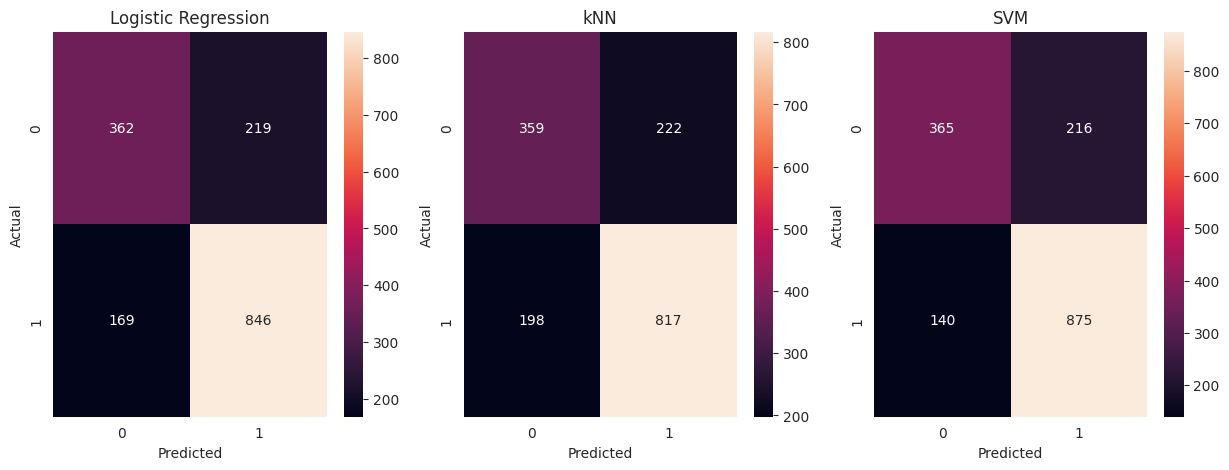

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Logistic Regression predictions and evaluation
log_reg_pred = log_reg.predict(X_test_scaled)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, log_reg_pred))

# kNN Euclidean predictions and evaluation
knn_euclidean_pred = knn_euclidean.predict(X_test_scaled)
print("kNN Classification Report:")
print(classification_report(y_test, knn_euclidean_pred))

# SVM predictions and evaluation
svm_pred = svm_model.predict(X_test_scaled)
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))

# Plotting Confusion Matrices in a (1x3) row
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
models = [log_reg, knn_euclidean, svm_model]
titles = ['Logistic Regression', 'kNN', 'SVM']

for i, model in enumerate(models):
    cm = confusion_matrix(y_test, model.predict(X_test_scaled))
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i])
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.show()

## Classification Analysis Summary

### Logistic Regression

- **Precision**: Average precision is 0.74, indicating a moderate level of accuracy in classifying positive instances.
- **Recall**: Average recall is 0.73, suggesting a fair ability of the model to detect positive instances.
- **F1-Score**: Macro-average F1-score is 0.73, showing a balanced performance between precision and recall.
- **Accuracy**: Overall accuracy is 76%, signifying that the model correctly predicts 76% of the outcomes.

### k-Nearest Neighbors (kNN)

- **Precision**: Average precision is 0.72, slightly lower than Logistic Regression, indicating accuracy in classifying positive instances.
- **Recall**: Average recall is 0.71, which is marginally lower compared to Logistic Regression, reflecting the model's ability to identify positive instances.
- **F1-Score**: Macro-average F1-score is 0.71, showing a reasonable balance between precision and recall but slightly lower than Logistic Regression.
- **Accuracy**: The overall accuracy is 74%, which means the model correctly predicts 74% of the outcomes, a bit lower than Logistic Regression.

### Support Vector Machine (SVM)

- **Precision**: Average precision is 0.76, the highest among the three models, indicating better accuracy in classifying positive instances.
- **Recall**: Average recall is 0.75, also the highest, suggesting a superior ability of the model to detect positive instances.
- **F1-Score**: Macro-average F1-score is 0.75, reflecting the best balance between precision and recall among the three models.
- **Accuracy**: The overall accuracy is 78%, the highest of the three models, indicating that the SVM is the most effective in predicting outcomes correctly.

### Conclusion

The SVM model shows the best overall performance in terms of precision, recall, F1-score, and accuracy. Logistic Regression and kNN models perform moderately well but are slightly outperformed by SVM in this analysis.
